<h1 align="center"><u>Explainability AI Project</u></h1>
<h3 align="center"><u>Clément MOLLY-MITTON  | Diane VERBECQ  |  Raphaël VIGNAL</u></h3>
<h3 align="center"><u>Paul ESCALIER</u></h3>

# Table of Contents
1. [Introduction](#introduction)
2. [Import](#imports)
3. [Data exploration and cleaning](#data-exploration-and-cleaning)
4. [Models and evaluation](#models-and-evaluation)     
5. [Conclusion](#conclusion)

# Introduction
***


# Imports
***

We import all the necessary librairy

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display, clear_output

# Data Exploration and Cleaning
***

In [2]:
original_data = pd.read_csv(r'dataset\World Energy Consumption.csv', delimiter= ',')
display(original_data.info())
display(original_data.head(5))
display(original_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.7+ MB


None

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,22012.000000,1.812300e+04,1.111300e+04,1747.000000,2687.000000,2302.000000,2767.000000,5275.000000,5527.000000,5492.000000,...,6849.000000,4035.000000,2413.000000,4639.000000,4744.000000,7065.000000,7996.000000,4065.000000,6886.000000,4101.000000
mean,1974.213247,1.053096e+08,3.585114e+11,46.091694,2.719074,133.558459,38.068209,64.716800,10.966685,1.954035,...,0.622750,0.210395,267.541206,7.314174,53.422938,62.811828,17.561153,232.108949,1.404910,0.651413
std,35.058653,4.640460e+08,2.411179e+12,274.616745,10.057018,264.707851,111.623148,201.043915,47.953561,5.274155,...,2.066186,0.643304,5940.944120,37.327922,273.255306,252.734217,101.693172,733.841324,4.489043,1.893820
min,1900.000000,1.833000e+03,1.642060e+08,-100.000000,-50.843000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-100.000000,-51.208000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1946.000000,1.712404e+06,1.365898e+10,-0.616500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.029000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1984.000000,6.991543e+06,4.167411e+10,8.179000,0.000000,15.482000,0.673000,0.146000,0.010000,0.062000,...,0.000000,0.000000,20.000000,0.000000,0.005000,0.000000,0.000000,0.051000,0.000000,0.003000
75%,2003.000000,2.557688e+07,1.744295e+11,26.508500,0.861500,165.266750,13.629500,34.289000,0.690000,1.577500,...,0.095000,0.018500,47.971000,0.315000,2.357750,2.101000,0.140000,45.523000,0.372000,0.268000
max,2022.000000,7.975105e+09,1.136302e+14,5659.328000,141.131000,2588.512000,1199.207000,2514.102000,677.570000,71.429000,...,40.000000,7.586000,242384.844000,665.413000,5487.600000,3219.852000,2139.230000,8422.012000,56.840000,26.157000


based on https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv we will keep only the relevant colulumn for us and we will clean the data

In [3]:
column_to_keep = [
    # Basic info per country
    "country",
    "year",
    "iso_code",
    "population",
    "gdp", # PIB

    # Annual electricity generation
    "biofuel_electricity",
    "coal_electricity",
    "fossil_electricity",
    "gas_electricity",
    "hydro_electricity",
    "nuclear_electricity",
    "oil_electricity",
    "solar_electricity",
    "wind_electricity",

    # Electricity generation per person
    "biofuel_elec_per_capita",
    "coal_elec_per_capita",
    "fossil_elec_per_capita",
    "gas_elec_per_capita",
    "hydro_elec_per_capita",
    "nuclear_elec_per_capita",
    "oil_elec_per_capita",
    "solar_elec_per_capita",
    "wind_energy_per_capita",

    # Carbon and gas emission
    "carbon_intensity_elec",
    "greenhouse_gas_emissions",
]

We will keep only the data from the column we have selected

In [4]:
df_analysis = original_data[column_to_keep]
df_analysis

,country,year,iso_code,population,gdp,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,...,coal_elec_per_capita,fossil_elec_per_capita,gas_elec_per_capita,hydro_elec_per_capita,nuclear_elec_per_capita,oil_elec_per_capita,solar_elec_per_capita,wind_energy_per_capita,carbon_intensity_elec,greenhouse_gas_emissions
0,ASEAN (Ember),2000,NaN,NaN,NaN,5.60,71.03,295.75,163.22,50.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.231,184.41
1,ASEAN (Ember),2001,NaN,NaN,NaN,6.02,80.02,320.51,185.35,54.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.358,198.34
2,ASEAN (Ember),2002,NaN,NaN,NaN,6.06,87.16,346.83,203.52,53.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,505.652,213.80
3,ASEAN (Ember),2003,NaN,NaN,NaN,6.69,98.51,371.44,216.92,53.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,513.698,229.70
4,ASEAN (Ember),2004,NaN,NaN,NaN,7.57,111.62,407.92,237.97,52.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.910,252.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.39,3.69,3.73,0.00,5.05,...,245.147,247.804,0.0,335.499,0.0,2.657,1.329,NaN,355.822,3.27
22008,Zimbabwe,2019,ZWE,15354606.0,NaN,0.38,3.62,3.66,0.00,4.17,...,235.760,238.365,0.0,271.580,0.0,2.605,1.954,NaN,387.136,3.19
22009,Zimbabwe,2020,ZWE,15669663.0,NaN,0.35,3.36,3.40,0.00,3.81,...,214.427,216.980,0.0,243.145,0.0,2.553,1.915,NaN,389.987,2.96
22010,Zimbabwe,2021,ZWE,15993525.0,NaN,0.38,3.57,3.61,0.00,4.00,...,223.215,225.716,0.0,250.101,0.0,2.501,2.501,NaN,392.279,3.15


Because during the creation of the dataset all the data were not available. Now let's see the null value

In [5]:
df_analysis.isnull().sum()

country                         0
year                            0
iso_code                     5500
population                   3889
gdp                         10899
biofuel_electricity         16485
coal_electricity            15568
fossil_electricity          15462
gas_electricity             15568
hydro_electricity           13128
nuclear_electricity         13496
oil_electricity             15568
solar_electricity           14056
wind_electricity            14016
biofuel_elec_per_capita     16737
coal_elec_per_capita        16162
fossil_elec_per_capita      16056
gas_elec_per_capita         16162
hydro_elec_per_capita       14134
nuclear_elec_per_capita     14365
oil_elec_per_capita         16162
solar_elec_per_capita       14981
wind_energy_per_capita      17947
carbon_intensity_elec       16847
greenhouse_gas_emissions    16706
dtype: int64

Now lets check if some year dont have any data 

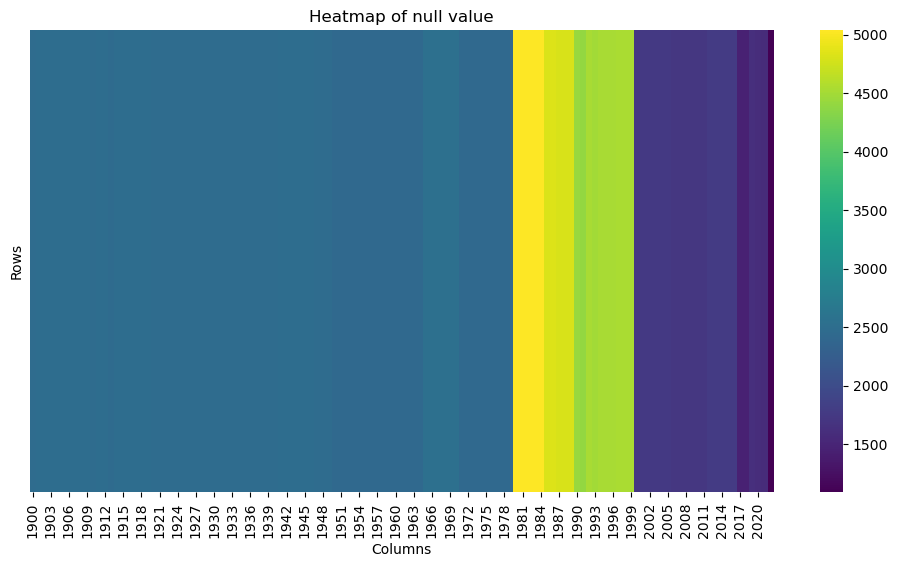

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_analysis.isnull().groupby(df_analysis["year"]).sum().sum(axis=1).to_frame().T, cmap="viridis", cbar=True, yticklabels=False)
plt.title("Heatmap of null value")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

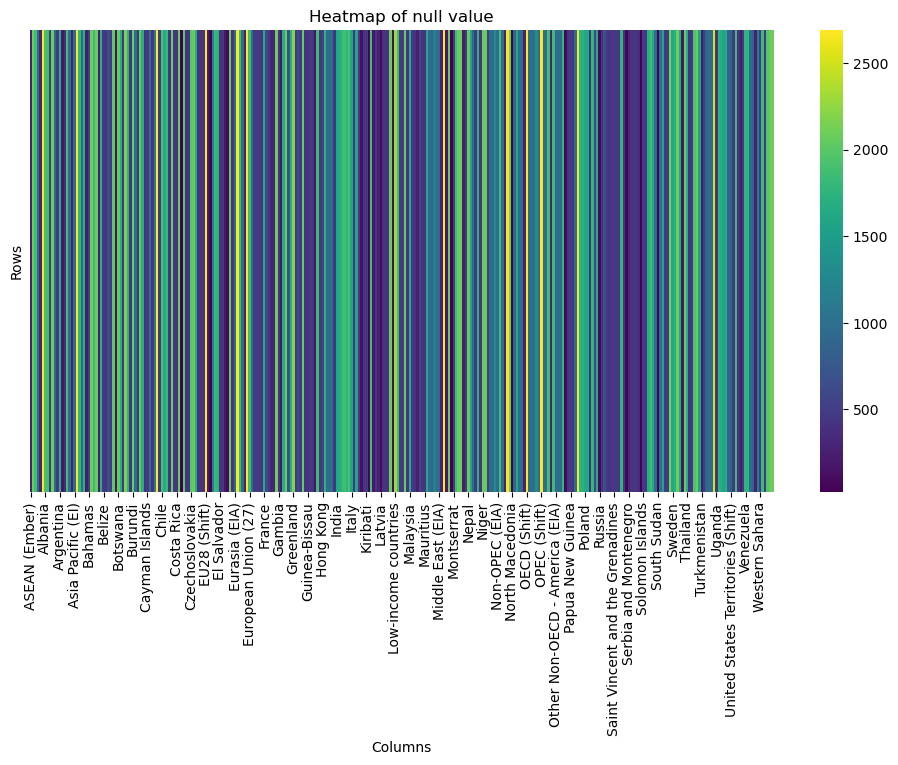

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_analysis.isnull().groupby(df_analysis["country"]).sum().sum(axis=1).to_frame().T, cmap="viridis", cbar=True, yticklabels=False)
plt.title("Heatmap of null value")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

Lets first check the pourcentage of null value per column

In [8]:
null_per_column = (df_analysis.isnull().sum() / df_analysis.shape[0] ) * 100
null_per_column

country                      0.000000
year                         0.000000
iso_code                    24.986371
population                  17.667636
gdp                         49.513902
biofuel_electricity         74.890969
coal_electricity            70.725059
fossil_electricity          70.243504
gas_electricity             70.725059
hydro_electricity           59.640196
nuclear_electricity         61.312012
oil_electricity             70.725059
solar_electricity           63.856079
wind_electricity            63.674359
biofuel_elec_per_capita     76.035799
coal_elec_per_capita        73.423587
fossil_elec_per_capita      72.942032
gas_elec_per_capita         73.423587
hydro_elec_per_capita       64.210431
nuclear_elec_per_capita     65.259858
oil_elec_per_capita         73.423587
solar_elec_per_capita       68.058332
wind_energy_per_capita      81.532800
carbon_intensity_elec       76.535526
greenhouse_gas_emissions    75.894966
dtype: float64

We can see that we have a lot a column with more than 50% of null value which mean that we have a lot of missing values in our dataset.This can be explain by the lack of data of certain country for certain year which is totally normal. We can also see that we have a lot of country which are a group of country or continent. We will try to clean them so that we only have the raw data.

In [9]:
for country in df_analysis["country"].unique():
    print(country)

ASEAN (Ember)
Afghanistan
Africa
Africa (EI)
Africa (Ember)
Africa (Shift)
Albania
Algeria
American Samoa
Angola
Antarctica
Antigua and Barbuda
Argentina
Armenia
Aruba
Asia
Asia & Oceania (EIA)
Asia (Ember)
Asia Pacific (EI)
Asia and Oceania (Shift)
Australia
Australia and New Zealand (EIA)
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
CIS (EI)
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central & South America (EIA)
Central African Republic
Central America (EI)
Central and South America (Shift)
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Czechoslovakia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
EU28 (Shift)
East Germany (EIA)
East Timor
Eastern Africa (EI)
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethio

In [10]:
country_to_delete = [
    "Africa",
    "Asia",
    "Europe",
    "Oceania",
    "World",
    "North America",
    "Lower-middle-income countries",
    "Low-income countries",
    "High-income countries",
    "Serbia and Montenegro",
    "South America",
    "USSR",
    "Upper-middle-income countries"
    # And the one with a () in them
]
df_analysis = df_analysis[~df_analysis["country"].isin(country_to_delete) & ~df_analysis["country"].str.contains(r"\(|\)", regex=True)]
for country in df_analysis["country"].unique():
    print(country)

Afghanistan
Albania
Algeria
American Samoa
Angola
Antarctica
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Czechoslovakia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
East Timor
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Falkland Islands
Faroe Islands
Fiji
Finland
France
French Guiana
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guadeloupe
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kaza

Now lets observe our data on a real map. First lets check the country that are not in the world map (no iso code)

In [11]:
df_analysis[df_analysis["iso_code"].isnull()]["country"].unique()

array(['Czechoslovakia', 'Kosovo', 'Yugoslavia'], dtype=object)

We can see that only a few don't have it so we will ignore it. Now lets plot our data on a map so that we can easely visualise them.

In [12]:
output = widgets.Output()

column_to_exclude = [
    "country",
    "year",
    "iso_code",
    "population",
    "gdp"
]

available_columns = [
    col for col in df_analysis.select_dtypes(include=['number']).columns.tolist()
    if col not in column_to_exclude
]

column_selector = widgets.Dropdown(
    options=available_columns,
    value="coal_electricity" if "coal_electricity" in available_columns else available_columns[0], 
    description="Select a column for the map: ",
    style={'description_width': 'initial'}
)

def get_valid_years(df, column):
    """All year after the first one where there is a non null value in the column given"""
    if column in df.columns:
        valid_years = df[df[column].notna()]["year"].unique()
        if len(valid_years) > 0:
            min_valid_year = min(valid_years)
            return sorted(df[df["year"] >= min_valid_year]["year"].unique())
    return sorted(df["year"].dropna().unique())

def update_map(change):
    """Update map and delete old display"""
    with output:
        clear_output() 
        
        column = column_selector.value
        years_available = get_valid_years(df_analysis, column)
        year_selected = years_available[-1] 

        # Create map
        fig = px.choropleth(
            df_analysis[df_analysis["year"] == year_selected],
            locations="iso_code",
            color=column,
            hover_name="country",
            color_continuous_scale="YlOrRd",
            range_color=(df_analysis[column].min(), df_analysis[column].max()),
            projection="natural earth",
            title=f"{column} ({year_selected})",
            locationmode="ISO-3"
        )

        fig.update_layout(
            width=1000,  
            height=600, 
            margin={"r":0, "t":50, "l":0, "b":0}  
        )

        # Create year slide
        fig.update_layout(
            sliders=[{
                "active": years_available.index(year_selected),
                "yanchor": "top",
                "xanchor": "left",
                "currentvalue": {"prefix": "Année : ", "font": {"size": 20}},
                "pad": {"b": 10, "t": 50},
                "len": 0.9,
                "x": 0.1,
                "y": 0,
                "steps": [
                    {
                        "args": [
                            {"z": [df_analysis[df_analysis["year"] == year][column].values],
                             "locations": [df_analysis[df_analysis["year"] == year]["iso_code"].values],
                             "text": [df_analysis[df_analysis["year"] == year]["country"].values]},
                            {"title.text": f"{column} ({year})"}
                        ],
                        "label": str(year),
                        "method": "update"
                    }
                    for year in years_available
                ]
            }]
        )

        display(fig)

column_selector.observe(update_map, names="value")

display(column_selector, output)

update_map(None)

Dropdown(description='Select a column for the map: ', index=1, options=('biofuel_electricity', 'coal_electrici…

Output()

From the map, we can observe that the high number of missing values is expected. Many countries lack data for several years (thats why some column start at 1985 and other earlier), depending on the selected column. This variation makes it difficult to ensure complete data coverage across all years. Therefore, for our analysis, we will keep the missing values as they are and begin our study from the first year where all selected columns have complete data.

# Models and Evaluation
***

# Conclusion
***